In [1]:
from retrieving_MaxMin_riskGroup import retrieving_MaxMin_riskGroup
from matplotlib import pyplot as plt

In [2]:
times, survival_curve_min, survival_curve_max, risk = retrieving_MaxMin_riskGroup(3)

Loading the model from data/ExtraST_model.zip


In [4]:
max(risk)

0.9861788182535833

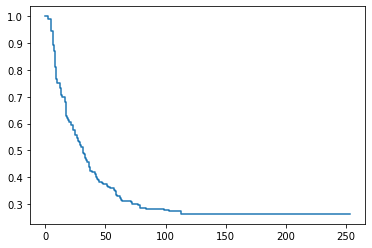

In [4]:
plt.step(times, survival_curve_max, where='post')

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
from preprocess_newdata import preprocess_newdata
from pysurvival.utils import load_model
from pysurvival.models.survival_forest import ExtraSurvivalTreesModel

In [2]:
data_path = 'data/train.csv'

In [3]:
features = pd.read_csv('data/Features_ExtraST_model.csv').iloc[:,1]
features.drop(features[features == 'missBIO2'].index, inplace = True)

#read the dataset
test_df = pd.read_csv(data_path)

#Select only the features used by the classifier
test_df = test_df[features]

#Fill missing columns (corresponding to missing values)
test_df.fillna(0, inplace=True)

#Target encoding + normalization
test_df = preprocess_newdata(test_df)

In [4]:
thr_info = pd.read_csv('data/thresholds.csv')
thr_12 = thr_info['Threshold1-2'][0]
thr_23 = thr_info['Threshold2-3'][0]
norm_info = thr_info['Normalization_max'][0]

In [5]:
estimator_loaded = load_model('data/ExtraST_model.zip')

Loading the model from data/ExtraST_model.zip


In [6]:
risk = estimator_loaded.predict_risk(test_df)

In [7]:
risk = np.log(risk)/norm_info

In [8]:
max(risk)

0.9861788182535833

In [9]:
min(risk)

0.9042700609471293